Elisa Stabilini - Matricola: 28326A

# Comparative analysis training REINFORCE vs DQN eith replay buffer

In [1]:
import gymnasium as gym 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import torch
import tensorflow as tf 
import matplotlib.pyplot as plt
import random
import os
import pickle
import timeit
import datetime
from pathlib import Path

2024-09-27 18:30:04.939331: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 18:30:05.223213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 18:30:05.399327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 18:30:05.432800: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 18:30:05.701668: I tensorflow/core/platform/cpu_feature_guar

In [2]:
Data_path_DQL = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/'
TrainedDQLearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots'
timename_DQL = '_20240821_180519'

In [3]:
TrainedDQLearning_data = Path('/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data')

errors_file_DQL = Data_path_DQL + 'training_errors' + timename_DQL + '.npz'
rewards_file_DQL = Data_path_DQL + 'rewards' + timename_DQL + '.npy'
episode_length_file_DQL = Data_path_DQL + 'episode_length' + timename_DQL + '.npy'
episode_info_file_DQL = Data_path_DQL + 'episode_info' + timename_DQL + '.pkl'

In [4]:
Data_path_RE = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Data/'
TrainedRELearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Plots'
timename_RE = '_20240822_161459'

In [5]:
TrainedRELearning_data = Path('/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Data')

errors_file_RE = Data_path_RE + 'training_errors' + timename_RE + '.npz'
rewards_file_RE = Data_path_RE + 'rewards' + timename_RE + '.npy'
episode_length_file_RE = Data_path_RE + 'episode_length' + timename_RE + '.npy'
episode_info_file_RE = Data_path_RE + 'episode_info' + timename_RE + '.pkl'

### Loading data

In [6]:
# Load the numpy arrays
rewards_DQL = np.load(rewards_file_DQL)
episode_lengths_DQL = np.load(episode_length_file_DQL)

# Load the pickle file
with open(episode_info_file_DQL, 'rb') as file:
    episode_info_DQL = pickle.load(file)

In [7]:
# Load the numpy arrays
rewards_RE = np.load(rewards_file_RE)
episode_lengths_RE = np.load(episode_length_file_RE)

# Load the pickle file
with open(episode_info_file_RE, 'rb') as file:
    episode_info_RE = pickle.load(file)

### Rewards comparison: standard training vs. replay buffer training

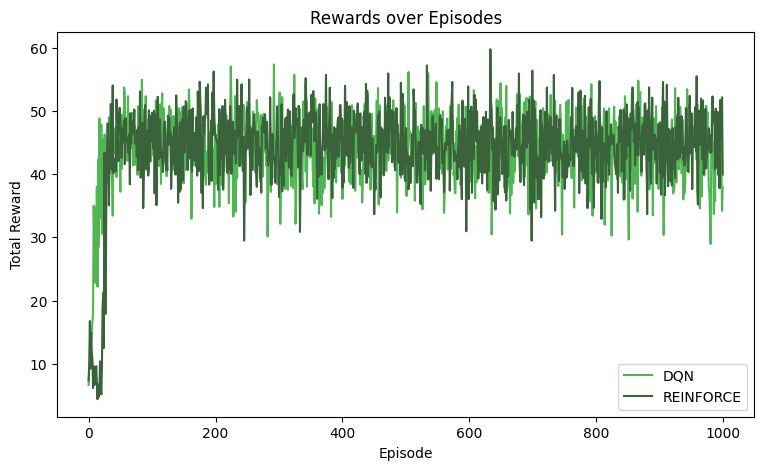

In [8]:
file_name = 'comparisonDQL_RE'

# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(rewards_DQL, label='DQN', color='#50B553') 
plt.plot(rewards_RE, label='REINFORCE', color='#3a623b')  
plt.title('Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

# Add legend
plt.legend()  # This will automatically use the labels you defined

imagefile = file_name + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)

plt.show()
 

### Dynamic plot

In [12]:
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from ipywidgets import interactive

In [10]:
print(len(episode_info_RE))

1000


In [11]:
x = episode_info_RE[0]['year']
graphs = [episode['raw_reward'] for episode in episode_info_RE]

In [13]:

# Generate data
x = np.linspace(0, 2 * np.pi, 100)
graphs = [
    np.sin(x),           # First graph (sin)
    np.cos(x),           # Second graph (cos)
    np.tan(x) / 10,      # Third graph (tan/10)
    np.log(x + 1),       # Fourth graph (logarithm)
]

# Create figure
fig = go.FigureWidget(make_subplots())

# Add traces, one for each graph
for i, y in enumerate(graphs):
    fig.add_trace(
        go.Scatter(
            x=x, 
            y=y, 
            name=f'Graph {i+1}', 
            line=dict(color=f'hsl({i*360/len(graphs)},50%,50%)'),
            visible=False
        )
    )

# Make the first graph visible initially
fig.data[0].visible = True

# Update layout
fig.update_layout(
    title="Dynamic Plot with Plotly",
    xaxis_title="X-axis label",
    yaxis_title="Y-axis label",
    xaxis_range=[0, 2*np.pi],
    yaxis_range=[-2, 2]
)

# Function to update the visible graph
def update_graph(graph_number):
    for i, trace in enumerate(fig.data):
        trace.visible = (i == graph_number - 1)
    fig.update_layout(title=f"Graph {graph_number}")

# Create an interactive widget
interactive_plot = interactive(update_graph, graph_number=(1, len(graphs)))

# Display the interactive plot
display(interactive_plot)
fig.show()

In [ ]:
imagefile = 'raw_rew_ep50' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

### Error calculation

In [16]:
errors_RE = np.load(errors_file_RE)

avg_error_RE = errors_RE[errors_RE.files[0]]
print(len(avg_error_RE))
all_error_RE = errors_RE[errors_RE.files[1]]
print(len(all_error_RE))

1000
1000


In [17]:
errors_DQL = np.load(errors_file_DQL)

avg_error_DQL = errors_DQL[errors_DQL.files[0]]
print(len(avg_error_DQL))
all_error_DQL = errors_DQL[errors_DQL.files[1]]
print(len(all_error_DQL))

29969
29969
